### __Smooth numbers__

__k-smooth number__:
An integer whose largest prime factor is $<=$ __k__

<br>

Let's do some prime factorization: <br>
$30 = 5*2*3$

<br>

__The largest__ prime factor of __30__ is __5__ and this means that __30__ is __5-smooth number__ . But also __30__ is __7-smooth number__ ; __11-smooth number__; __13-smooth number__ etc.


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [4]:
# How to identify the largest prime factor for numbers between 2 and 10000
def is_prime_number(number):
    max_test_num = int(np.ceil(number/2))
    divider = 2
    while number % divider != 0 and divider < max_test_num:
        divider +=1
    if number % divider == 0 and number != 2:
        return False
    else:
        return True

primes = []

for number in range(2, 10000):
    if is_prime_number(number):
        primes.append(number)

In [66]:
def largest_prime_factor(number, prime_numbers):
    if number in prime_numbers:
        return number
    max_test_num = int(np.ceil(number/2))
    prime_numbers = [el for el in prime_numbers if el <= max_test_num]
    
    prime_dividers = []
    for prime_divider in prime_numbers:
        if number % prime_divider == 0 and prime_divider <= max_test_num :
            prime_dividers.append(prime_divider)
            number = number / prime_divider
    return max(prime_dividers)

[   2    3    2 ... 4999  101    5]


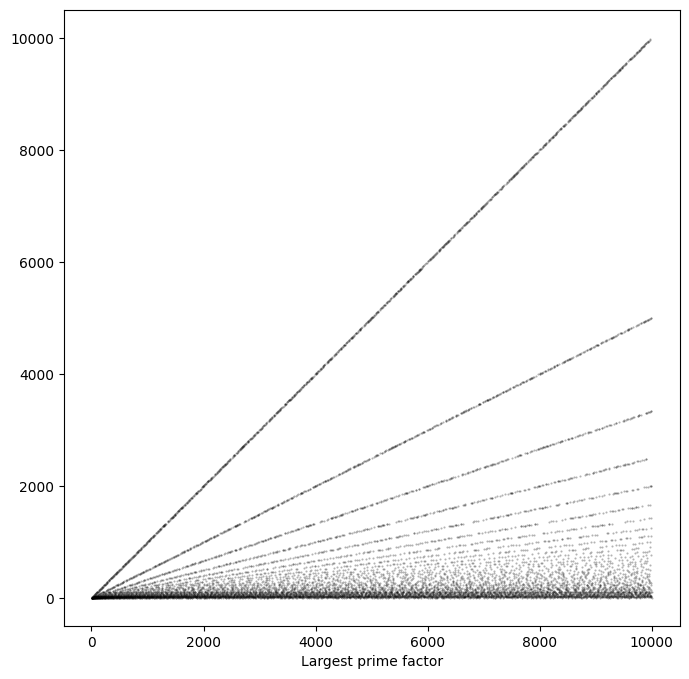

In [97]:
nums = np.arange(2, 10001)
largest_prime_factors = np.array([largest_prime_factor(el, primes) for el in nums])
print(largest_prime_factors)
plt.plot(nums, largest_prime_factors, 'ko', markersize=.5, alpha=0.3)
plt.gcf().set_size_inches(10, 8)
plt.axis('square')
plt.xlabel('Number')
plt.xlabel('Largest prime factor')
plt.show()

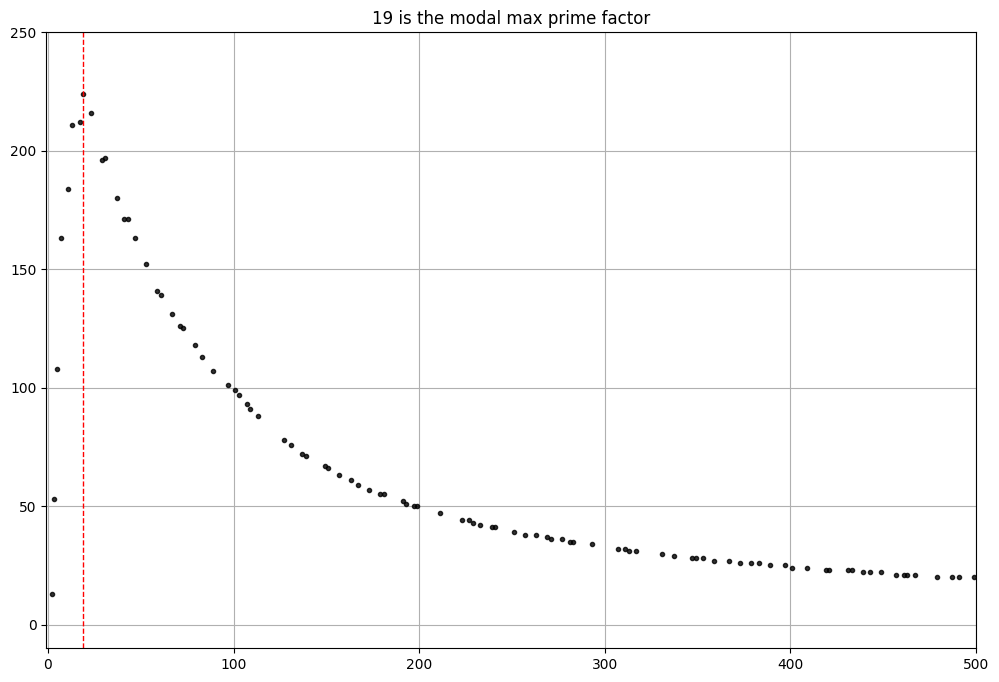

In [126]:
unique_prime_factors = np.unique(largest_prime_factors)
# print(unique_prime_factors)

  
counter = [np.sum(largest_prime_factors==el) for el in unique_prime_factors]
most_freq_idx = np.argmax(counter)
most_freq_y = counter[most_freq_idx]
most_freq_x = unique_prime_factors[most_freq_idx]

plt.plot(unique_prime_factors, counter,  'k.', alpha=0.8)
plt.plot([most_freq_x, most_freq_x], [-10, 250], 'r--', linewidth=1)

plt.title('%s is the modal max prime factor' % most_freq_x)
plt.xlim([-1, 500])
plt.ylim([-10, 250])
plt.grid()
plt.gcf().set_size_inches(12, 8)
plt.show()

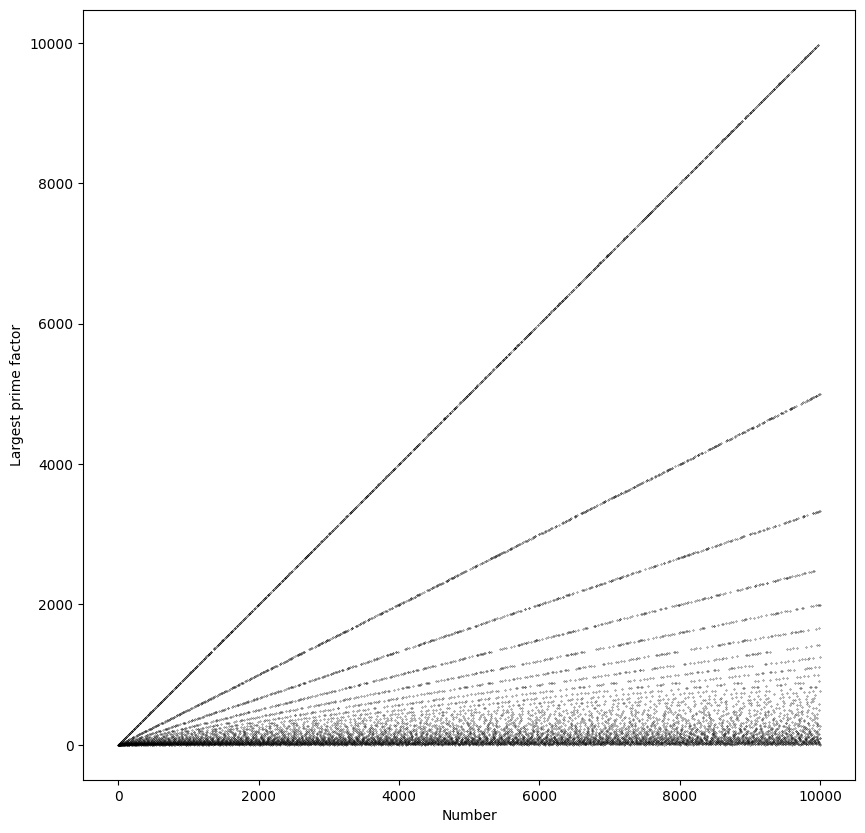

In [104]:
maximum_number = 10000
numbers = np.arange(2, maximum_number+1)

largest_prime_fact = np.zeros(len(numbers), dtype=int)

for num_idx, num in enumerate(numbers):
    largest_prime_fact[num_idx] = np.max(sym.primefactors(num))  

plt.plot(largest_prime_fact, 'k.', markersize=.5)
plt.xlabel('Number')
plt.ylabel('Largest prime factor')
plt.gcf().set_size_inches(10,10)
plt.gca().set_aspect('equal')
plt.show()